## Melanoma Detection Assignment

### Problem statement 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [24]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:\Skin_cancer_ISIC\Train")
data_dir_test = pathlib.Path("C:\Skin_cancer_ISIC\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

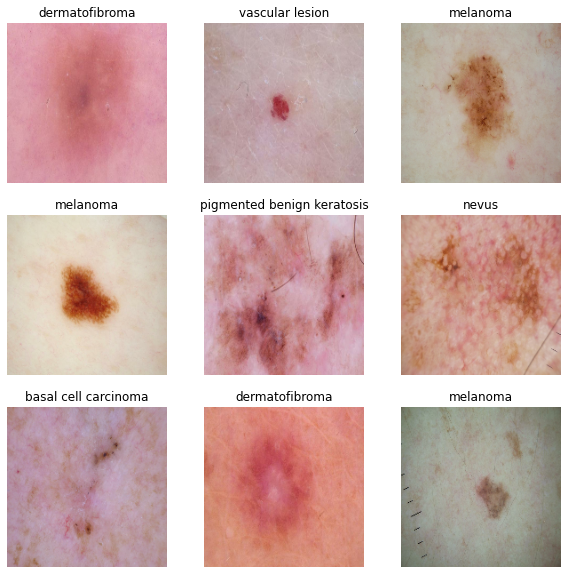

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 flatten (Flatten)           (None, 1036800)           0         
                                                                 
 dense (Dense)               (None, 64)                66355264  
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 66,360,937
Trainable params: 66,360,937
No

### Train the model

In [37]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 59s 1s/step - loss: 12.1130 - accuracy: 0.2372 - val_loss: 1.8733 - val_accuracy: 0.3535
Epoch 2/20
56/56 [==============================] - 58s 1s/step - loss: 1.5404 - accuracy: 0.4849 - val_loss: 1.4940 - val_accuracy: 0.4966
Epoch 3/20
56/56 [==============================] - 57s 1s/step - loss: 1.4718 - accuracy: 0.5011 - val_loss: 1.4884 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 58s 1s/step - loss: 1.1303 - accuracy: 0.6189 - val_loss: 1.7329 - val_accuracy: 0.4407
Epoch 5/20
56/56 [==============================] - 58s 1s/step - loss: 0.9444 - accuracy: 0.6881 - val_loss: 1.7018 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 58s 1s/step - loss: 0.7552 - accuracy: 0.7489 - val_loss: 2.1485 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 58s 1s/step - loss: 0.6115 - accuracy: 0.7924 - val_loss: 1.7936 - val_accuracy: 0.5190
Epoch 8/20
56/56 [=

### Visualizing training results

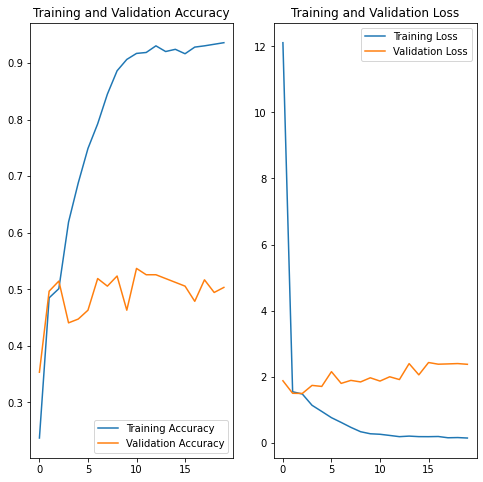

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- Training accuracy continues after each epoch it raise from 24% on the first epoch to 93% on the 20th epoch
- Validation accuracy improvement initially, then it settle around 50%
- Training error continues to decrease on each epoch, but the validation error slightly increases after each epoch.

Conclusion: The difference in accuracy as well as errors between training and validation is huge. This is a clear sign of overfilling and the model seems to be learning noises as well.

This can be improved by sourcing more data or augmenting more data.

In [14]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
tf.get_logger().setLevel('ERROR')
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

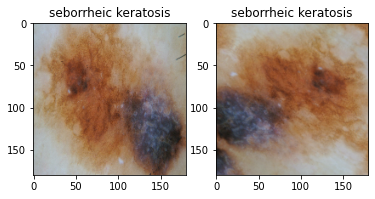

In [15]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
for img, label in train_ds.take(1):
    aug_img = data_augmentation(img)
    ax = plt.subplot(1, 2, 1)
    plt.imshow(img[2].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    ax = plt.subplot(1, 2, 2)
    plt.imshow(aug_img[2].numpy().astype("uint8"))
    plt.title(class_names[label[i]])

### Todo:
### Create the model, compile and train the model


In [16]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9

model2 = tf.keras.Sequential([  
    data_augmentation, model
])

### Compiling the model

In [17]:
## Your code goes here
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [84]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 49s 872ms/step - loss: 1.9449 - accuracy: 0.3237 - val_loss: 1.8972 - val_accuracy: 0.3602
Epoch 2/20
56/56 [==============================] - 48s 863ms/step - loss: 1.8581 - accuracy: 0.3583 - val_loss: 1.8517 - val_accuracy: 0.3758
Epoch 3/20
56/56 [==============================] - 47s 837ms/step - loss: 1.8086 - accuracy: 0.3767 - val_loss: 1.7982 - val_accuracy: 0.3691
Epoch 4/20
56/56 [==============================] - 47s 837ms/step - loss: 1.7783 - accuracy: 0.4001 - val_loss: 1.7598 - val_accuracy: 0.4116
Epoch 5/20
56/56 [==============================] - 47s 833ms/step - loss: 1.7118 - accuracy: 0.4096 - val_loss: 1.7245 - val_accuracy: 0.4318
Epoch 6/20
56/56 [==============================] - 47s 836ms/step - loss: 1.6259 - accuracy: 0.4353 - val_loss: 1.7427 - val_accuracy: 0.3669
Epoch 7/20
56/56 [==============================] - 48s 850ms/step - loss: 1.5893 - accuracy: 0.4481 - val_loss: 1.7049 - val_accuracy: 0.4743

### Visualizing the results

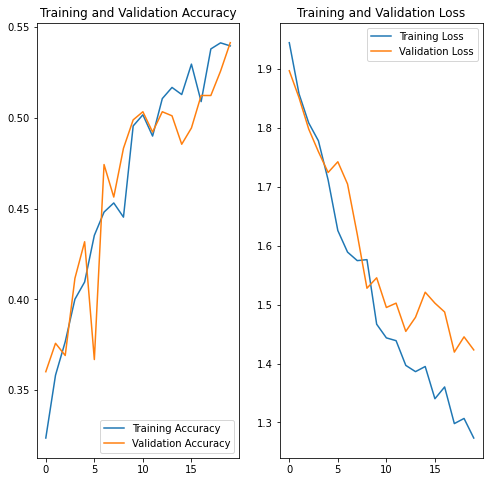

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- Both training accuracy and Validation accuracy are almost the same. Hence we have avoided the overfitting problem.
- The overall accuracy of the model is ~54%. This needs to be imporved.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [55]:
## Your code goes here.
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?
- "pigmented benign keratosis" has highest number of samples of 462
- "seborrheic keratosis" has lowest number of samples of 77
- The difference in sample propotion is the over six time. This is leading to low accuracy in the model.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [98]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [104]:
path_to_training_dataset="C:\Skin_cancer_ISIC\Train\/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CEBFAC3A30>: 100%|█| 500/500 [00:01<00:00, 252.91 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CE8DD50070>: 100%|█| 500/500 [00:01<00:00, 254.97 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CE8AEC6D60>: 100%|█| 500/500 [00:01<00:00, 253.44 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1CE8C1B0130>: 100%|█| 500/500 [00:10<00:00, 46.02 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CE8022BC40>: 100%|█| 500/500 [00:10<00:00, 47.97 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CE8AE1D760>: 100%|█| 500/500 [00:02<00:


Initialised with 77 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1CE8AE26DF0>: 100%|█| 500/500 [00:05<00:00, 96.35 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CE8C1B0E20>: 100%|█| 500/500 [00:02<00:00, 222.06 Samples


Initialised with 139 image(s) found.
Output directory set to C:\Skin_cancer_ISIC\Train\/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CE8AEB6880>: 100%|█| 500/500 [00:02<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [19]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_334323b7-81d4-439b-a6f3-3e89acfa0a10.jpg',
 'C:\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_608a711e-40f1-401c-a671-22bfa09ad515.jpg',
 'C:\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a5934307-e61f-4c98-9afc-36aeafc55770.jpg',
 'C:\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b73169bd-a43e-4f82-86b4-3cd767447404.jpg',
 'C:\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_d0b1c881-8298-4fab-8296-9f7dc2b0d4f3.jpg',
 'C:\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_19a59de3-58c6-4075-8cc6-5a27cb00fb81.jpg',
 'C:\\Skin_cancer_ISIC\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_1eba3fee-02a4-47ce-a527-d40b

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [34]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [56]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [57]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [60]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [61]:
data_dir_train="C:\Skin_cancer_ISIC\Train+Augmented"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [62]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [86]:
## your code goes here
num_classes = 9

model3 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [87]:
## your code goes here
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [89]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 97s 571ms/step - loss: 1.8006 - accuracy: 0.3119 - val_loss: 1.4921 - val_accuracy: 0.4328
Epoch 2/50
169/169 [==============================] - 97s 570ms/step - loss: 1.2946 - accuracy: 0.5295 - val_loss: 1.2470 - val_accuracy: 0.5568
Epoch 3/50
169/169 [==============================] - 99s 583ms/step - loss: 1.0335 - accuracy: 0.6491 - val_loss: 1.1650 - val_accuracy: 0.5939
Epoch 4/50
169/169 [==============================] - 102s 603ms/step - loss: 0.7336 - accuracy: 0.7557 - val_loss: 1.1315 - val_accuracy: 0.6466
Epoch 5/50
169/169 [==============================] - 96s 566ms/step - loss: 0.5453 - accuracy: 0.8260 - val_loss: 1.0978 - val_accuracy: 0.6496
Epoch 6/50
169/169 [==============================] - 97s 572ms/step - loss: 0.3907 - accuracy: 0.8819 - val_loss: 1.0975 - val_accuracy: 0.7082
Epoch 7/50
169/169 [==============================] - 96s 568ms/step - loss: 0.2992 - accuracy: 0.9099 - val_loss: 1.1550 - val_a

#### **Todo:**  Visualize the model results

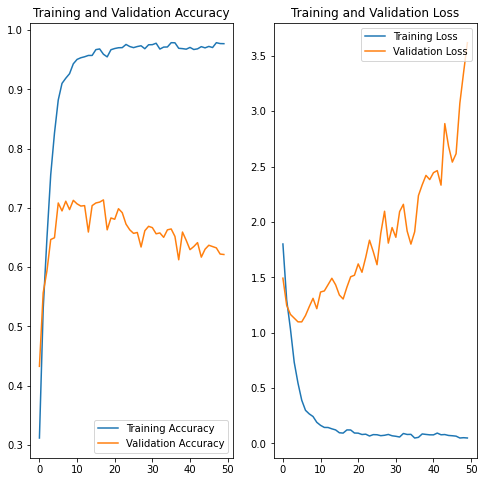

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- The validation score jumped from ~54% to 71% by addressing class imbalance and more augmented data.
- The difference between Train and Validation accuracy is around 20%, which can be improved by sourcing more data to train.
- The validation accuracy trend improved till epoch 18 and then started deteriorating gradually. Hence it appears the ideal epoch for the third model is around 18.
